In [4]:
import numpy as np
from math import pi

In [23]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

legend_opts = {
    'fontsize':15,
    'frameon':True, 
    'framealpha':1,
    'facecolor':'white',
    'edgecolor':'black',
    'labelspacing':0.1}

def savefig(fig, filename, **kwargs):
    fig.savefig(f'../viz/{filename}', bbox_inches='tight', **kwargs)

# Box-Muller

In [35]:
rng = np.random.RandomState(seed=42)
u1s = rng.uniform(size=1000)
u2s = rng.uniform(size=1000)
ss = -np.log(u1s)
thetas = 2*pi*u2s
rs = np.sqrt(2*ss)
xs = rs * np.cos(thetas)
ys = rs * np.sin(thetas)

In [36]:
def update(i, fig, s_axcenter, s_axbottom, s_axright, 
           theta_axcenter, theta_axbottom, theta_axright, xy_ax, verbose=False):
    if verbose and i%100==0:
        print(i)
    fig.suptitle(f'Sample {i+1}', fontsize=20)
    
    # Plot trace lines going from uniform to exponential for S
    s_axcenter.scatter(u1s[i], 6, color='tab:green', marker='.', clip_on=False)
    s_axcenter.vlines(u1s[i], ss[i], 6, color='tab:green', linewidth=1, linestyles=':')
    s_axcenter.scatter(1, ss[i], color='tab:blue', marker='.', clip_on=False)
    s_axcenter.hlines(ss[i], u1s[i], 2*pi, color='tab:blue', linewidth=1, linestyles=':')
    
    # Plot trace lines going from uniform to uniform(0, 2*pi) for theta
    theta_axcenter.scatter(u2s[i], 0, color='tab:brown', marker='.', clip_on=False)
    theta_axcenter.vlines(u2s[i], 0, thetas[i], color='tab:brown', linewidth=1, linestyles=':')
    theta_axcenter.scatter(1, thetas[i], color='tab:red', marker='.', clip_on=False)
    theta_axcenter.hlines(thetas[i], u2s[i], 2*pi, color='tab:red', linewidth=1, linestyles=':')
    
    # Update histograms when each sample is generated
    u1, u2, theta, s = u1s[i], u2s[i], thetas[i], ss[i]
    rounded_u1, rounded_u2, rounded_theta, rounded_s = np.floor(u1*10)/10, np.floor(u2*10)/10, np.floor(theta*10)/10, np.floor(s*10)/10

    u1_counts.setdefault(rounded_u1, 0)
    s_axbottom.add_artist(Rectangle((rounded_u1, u1_counts[rounded_u1]), 0.1, 1, facecolor='tab:green'))
    u1_counts[rounded_u1] += 1
    
    u2_counts.setdefault(rounded_u2, 0)
    theta_axbottom.add_artist(Rectangle((rounded_u2, u2_counts[rounded_u2]), 0.1, 1, facecolor='tab:brown'))
    u2_counts[rounded_u2] += 1

    s_counts.setdefault(rounded_s, 0)
    s_axright.add_artist(Rectangle((s_counts[rounded_s], rounded_s), 1, 0.1, facecolor='tab:blue'))
    s_counts[rounded_s] += 1
    
    theta_counts.setdefault(rounded_theta, 0)
    theta_axright.add_artist(Rectangle((theta_counts[rounded_theta], rounded_theta), 1, 0.1, facecolor='tab:red'))
    theta_counts[rounded_theta] += 1
    
    # Plot each Gaussian sample in the x-y plane, along with a vector for its distance and an arc for its angle
    r, x, y = rs[i], xs[i], ys[i]
    xy_ax.scatter(x, y, color='tab:gray', marker='.')
    # Delete vector and arc from previous animation step
    if xy_ax.artists:
        xy_ax.artists = []
    if xy_ax.patches:
        xy_ax.patches = []
    xy_ax.arrow(0, 0, x, y, head_width=0.3, head_length=0.3, length_includes_head=True, color='tab:blue', lw=2)
    xy_ax.add_patch(Arc((0, 0), 1, 1, theta1=0, theta2=theta*180/pi, edgecolor='tab:red', lw=2))

0
0
100
200
300
400
500
600
700
800
900
0


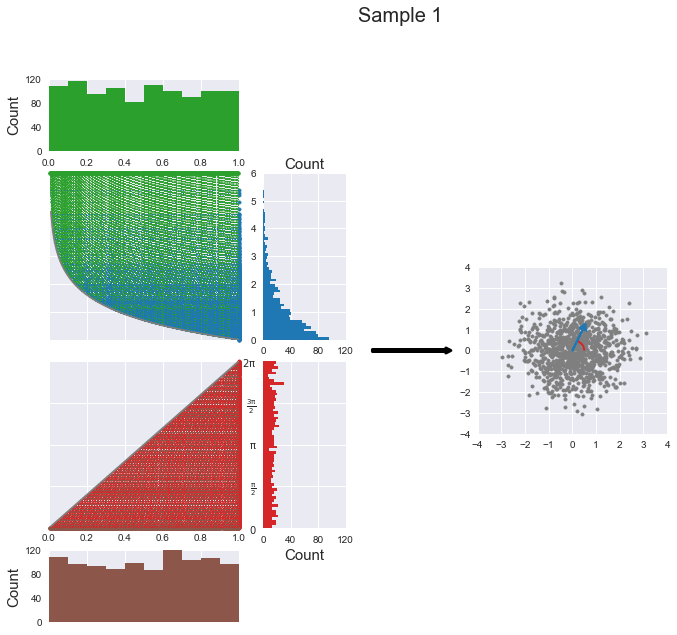

In [38]:
fig = plt.figure(figsize=(13, 10))
grid = plt.GridSpec(6, 7, wspace=0.3, hspace=0.3)
A = np.arange(0.01, 1.01, 0.01)

# Exponential inverse CDF to generate half of squared radius (S)
s_axcenter = fig.add_subplot(grid[1:3, :2])
s_axcenter.plot(A, -np.log(A), color='tab:gray')
s_axcenter.set_xlim(0, 1)
s_axcenter.set_ylim(0, 6)
plt.setp(s_axcenter.get_xticklabels(), visible=False)
plt.setp(s_axcenter.get_yticklabels(), visible=False)

# Uniform histogram to count U1 samples that are used to generate S
s_axtop = fig.add_subplot(grid[0, :2], sharex=s_axcenter)
s_axtop.set_ylim(0, 120)
s_axtop.set_yticks(np.arange(0, 121, 40))
# s_axtop.set_xlabel(r'$\mathrm{U_1 \sim Unif(0, 1)}$', fontsize=15, color='tab:green')
s_axtop.xaxis.set_label_position('top') 
s_axtop.set_ylabel('Count', fontsize=15)

# Exponential histogram to count generated S samples
s_axright = fig.add_subplot(grid[1:3, 2], sharey=s_axcenter)
s_axright.set_xlim(0, 120)
s_axright.set_xticks(np.arange(0, 121, 40))
s_axright.set_xlabel('Count', fontsize=15)
s_axright.xaxis.set_label_position('top')
# s_axright.text(1.1, 0.5, r'$\mathrm{S = -log(U_1)}$' + '\n' r'$\mathrm{\sim Expo(1)}$' + '\n' + r'$\mathrm{\Downarrow}$' + '\n' + r'$\mathrm{R = \sqrt{2S}}$', fontsize=15, color='tab:blue', transform=s_axright.transAxes, va='center', multialignment='center')

# Uniform inverse CDF to generate angle (theta)
theta_axcenter = fig.add_subplot(grid[3:5, :2])
theta_axcenter.plot(A, 2*pi*A, color='tab:gray')
theta_axcenter.set_xlim(0, 1)
theta_axcenter.set_ylim(0, 2*pi)
theta_axcenter.set_yticklabels([r'$\mathrm{0}$', r'$\mathrm{\frac{\pi}{2}}$', r'$\mathrm{\pi}$', r'$\mathrm{\frac{3\pi}{2}}$', r'$\mathrm{2\pi}$'], fontsize=20)
plt.setp(theta_axcenter.get_xticklabels(), visible=False)
plt.setp(theta_axcenter.get_yticklabels(), visible=False)

# Uniform histogram to count U2 samples that are used to generate theta
theta_axbottom = fig.add_subplot(grid[5, :2], sharex=theta_axcenter)
theta_axbottom.set_ylim(0, 120)
theta_axbottom.set_yticks(np.arange(0, 121, 40))
theta_axbottom.xaxis.tick_top()
# theta_axbottom.set_xlabel(r'$\mathrm{U_2 \sim Unif(0, 1)}$', fontsize=15, color='tab:brown')
theta_axbottom.set_ylabel('Count', fontsize=15)

# Uniform histogram to count generated theta samples
theta_axright = fig.add_subplot(grid[3:5, 2], sharey=theta_axcenter)
theta_axright.set_xlim(0, 120)
theta_axright.set_xticks(np.arange(0, 121, 40))
theta_axright.set_yticks([0, pi/2, pi, 3*pi/2, 2*pi])
# theta_axright.text(1.1, 0.5, r'$\mathrm{\theta = 2 \pi U_2}$' + '\n' + r'$\mathrm{\sim Unif(0, 2\pi)}}$', fontsize=15, color='tab:red', transform=theta_axright.transAxes, va='center', multialignment='center')
theta_axright.set_xlabel('Count', fontsize=15)

# x-y plane to plot generated Gaussian samples
xy_ax = fig.add_subplot(grid[2:4, 4:6])
xy_ax.set_xlim(-4, 4)
xy_ax.set_ylim(-4, 4)
xy_ax.set_xticks(range(-4, 5))
xy_ax.set_yticks(range(-4, 5))
# xy_ax.text(0.5, -0.15, r'$\mathrm{x=R\ cos(\theta)}$' + '\n' + r'$\mathrm{=\sqrt{-2\ log( U_{1})} \ cos( 2\pi U_{2})}}$', transform=xy_ax.transAxes, fontsize=15, ha='center', va='top')
# xy_ax.text(1.05, 0.5, r'$\mathrm{y=R\ sin(\theta)}$' + '\n' + r'$\mathrm{=\sqrt{-2\ log( U_{1})} \ sin( 2\pi U_{2})}}$', transform=xy_ax.transAxes, fontsize=15, ha='left', va='center', multialignment='center')

# Pane containing arrows from the histograms of S and theta to the x-y plane
arrow_ax = fig.add_subplot(grid[2:4, 3])
arrow_ax.axis('off')
arrow_ax.annotate('', xy=(1, 0.5), xytext=(0, 0.5), xycoords='axes fraction', arrowprops=dict(arrowstyle='simple', lw=3))

# Dicts to track how many samples are in each bin of histogram
u1_counts = {}
u2_counts = {}
theta_counts = {}
s_counts = {}

anim = FuncAnimation(fig, lambda i: update(i, fig, s_axcenter, s_axtop, s_axright, 
                                           theta_axcenter, theta_axbottom, theta_axright, xy_ax, verbose=True), 
                     frames=range(len(u1s)), interval=100)
anim.save('../viz/box_muller2.mp4', writer='ffmpeg')